<a href="https://colab.research.google.com/github/junhyuk426/MyFirstRepo/blob/main/DataCrawling_1st_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xmltodict

In [ ]:
import requests
import pandas as pd
import xmltodict
from urllib.parse import urlencode, quote_plus, unquote

api = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty'
key = unquote('pYr+PLO91EiJJotnEeFg0f6/fv0ued0gpR1tIPtt5+l7u0lvzFKN3RzLi1yTPIJ4cmxDV603j8E/46IeA9wLsQ==')

queryParams = '?' + urlencode({quote_plus('serviceKey') : key,
                               quote_plus('returnType') : 'xml',
                               quote_plus('numOfRows') : '2201',
                               quote_plus('pageNo') : '1',
                               quote_plus('stationName') : '대명동',
                               quote_plus('dataTerm') : '3MONTH',
                               quote_plus('ver') : '1.0'
                              })

url = api+queryParams
res = requests.get(url).content

xml =  xmltodict.parse(res)
dict_data = xml['response']['body']['items']['item']

df = pd.DataFrame(dict_data)

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/air_data.csv'


In [ ]:
from bs4 import BeautifulSoup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/air_data.csv'

df = pd.read_csv(file_path, encoding='cp949')
columns_name = {
    'dataTime' : '측정일',
    'mangName' : '측정망 정보',
    'so2Value' : '아황산가스 농도',
    'coValue' : '일산화탄소 농도',
    'o3Value' : '오존 농도',
    'no2Value' : '이산화 질소 농도',
    'KhaiValue' : '통합대기환경수치',
    'KhaiGrade' : '통합대기환경지수',
    'so2Grade' : '아황산가스 지수',
    'coGrade' : '일산화탄소 지수',
    'o3Grade' : '오존 지수',
    'no2Grade' : '이산화질소 지수',
    'so2Flag' : '아황산가스 플래그',
    'coFlag' : '일산화탄소 플래그',
    'o3Flag' : '오존 플래그',
    'no2Flag' : '이산화질소 플래그'
}
df.rename(columns=columns_name, inplace = True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = df.drop(['아황산가스 플래그',
              '일산화탄소 플래그',
              '오존 플래그',
              '이산화질소 플래그',
              'pm10Flag',
              'pm25Flag'], axis=1)

In [ ]:
print(df)

      아황산가스 지수 khaiValue 아황산가스 농도 일산화탄소 농도 pm10Value  오존 지수  khaiGrade  \
0          1.0        50    0.003      0.4        35    1.0        1.0   
1          1.0        50    0.002      0.4        25    1.0        1.0   
2          1.0        48    0.001      0.4        23    1.0        1.0   
3          1.0        58    0.002      0.3        19    2.0        2.0   
4          1.0        62    0.002      0.2        22    2.0        2.0   
...        ...       ...      ...      ...       ...    ...        ...   
2196       1.0        47    0.002      0.2        29    1.0        1.0   
2197       1.0        47    0.002      0.2        27    1.0        1.0   
2198       1.0        47    0.002      0.2        24    1.0        1.0   
2199       1.0        47    0.002      0.2        18    1.0        1.0   
2200       1.0        43    0.002      0.2        24    1.0        1.0   

     pm25Value  이산화질소 지수  pm25Grade               측정일  일산화탄소 지수 이산화 질소 농도  \
0           18       1.0        1.

In [ ]:
new_column = ['측정일',
              '아황산가스 농도', '아황산가스 지수',
              '일산화탄소 농도', '일산화탄소 지수',
              '오존 농도', '오존 지수',
              '이산화 질소 농도', '이산화질소 지수',
              'pm10Grade', 'pm10Value',
              'pm25Grade', 'pm25Value',
              'khaiGrade', 'khaiValue']
df = df[new_column]
df.to_csv('/content/drive/MyDrive/딥러닝/air.csv', index = False)
print(df)

                   측정일 아황산가스 농도  아황산가스 지수 일산화탄소 농도  일산화탄소 지수  오존 농도  오존 지수  \
0     2023-11-03 21:00    0.003       1.0      0.4       1.0  0.029    1.0   
1     2023-11-03 20:00    0.002       1.0      0.4       1.0  0.028    1.0   
2     2023-11-03 19:00    0.001       1.0      0.4       1.0  0.029    1.0   
3     2023-11-03 18:00    0.002       1.0      0.3       1.0  0.039    2.0   
4     2023-11-03 17:00    0.002       1.0      0.2       1.0  0.044    2.0   
...                ...      ...       ...      ...       ...    ...    ...   
2196  2023-08-04 09:00    0.002       1.0      0.2       1.0  0.018    1.0   
2197  2023-08-04 08:00    0.002       1.0      0.2       1.0  0.011    1.0   
2198  2023-08-04 07:00    0.002       1.0      0.2       1.0  0.007    1.0   
2199  2023-08-04 06:00    0.002       1.0      0.2       1.0  0.008    1.0   
2200  2023-08-04 05:00    0.002       1.0      0.2       1.0  0.013    1.0   

     이산화 질소 농도  이산화질소 지수  pm10Grade pm10Value  pm25Grade pm25Va

In [ ]:
df['측정일']

0       2023-11-03 21:00
1       2023-11-03 20:00
2       2023-11-03 19:00
3       2023-11-03 18:00
4       2023-11-03 17:00
              ...       
2196    2023-08-04 09:00
2197    2023-08-04 08:00
2198    2023-08-04 07:00
2199    2023-08-04 06:00
2200    2023-08-04 05:00
Name: 측정일, Length: 2201, dtype: object

In [48]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/딥러닝/air.csv')

In [49]:
print(df)

                   측정일 아황산가스 농도  아황산가스 지수 일산화탄소 농도  일산화탄소 지수  오존 농도  오존 지수  \
0     2023-11-03 21:00    0.003       1.0      0.4       1.0  0.029    1.0   
1     2023-11-03 20:00    0.002       1.0      0.4       1.0  0.028    1.0   
2     2023-11-03 19:00    0.001       1.0      0.4       1.0  0.029    1.0   
3     2023-11-03 18:00    0.002       1.0      0.3       1.0  0.039    2.0   
4     2023-11-03 17:00    0.002       1.0      0.2       1.0  0.044    2.0   
...                ...      ...       ...      ...       ...    ...    ...   
2196  2023-08-04 09:00    0.002       1.0      0.2       1.0  0.018    1.0   
2197  2023-08-04 08:00    0.002       1.0      0.2       1.0  0.011    1.0   
2198  2023-08-04 07:00    0.002       1.0      0.2       1.0  0.007    1.0   
2199  2023-08-04 06:00    0.002       1.0      0.2       1.0  0.008    1.0   
2200  2023-08-04 05:00    0.002       1.0      0.2       1.0  0.013    1.0   

     이산화 질소 농도  이산화질소 지수  pm10Grade pm10Value  pm25Grade pm25Va

In [51]:

df['측정일'] = pd.to_datetime(df['측정일'], format='%Y-%m-%d %H:%M', errors='coerce')

# 유효하지 않은 시간 값을 NaT (Not-a-Time)로 대체
df['측정일'].fillna(pd.NaT, inplace=True)

# '연', '월', '일', '시간' 열을 추출
df['year'] = df['측정일'].dt.year
df['month'] = df['측정일'].dt.month
df['day'] = df['측정일'].dt.day
df['time'] = df['측정일'].dt.hour

In [52]:
print(df.iloc[0])

측정일          2023-11-03 21:00:00
아황산가스 농도                   0.003
아황산가스 지수                     1.0
일산화탄소 농도                     0.4
일산화탄소 지수                     1.0
오존 농도                      0.029
오존 지수                        1.0
이산화 질소 농도                  0.024
이산화질소 지수                     1.0
pm10Grade                    1.0
pm10Value                     35
pm25Grade                    1.0
pm25Value                     18
khaiGrade                    1.0
khaiValue                     50
year                      2023.0
month                       11.0
day                          3.0
time                        21.0
Name: 0, dtype: object


In [7]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 런타임 다시 시작

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

plt.rc('font', family='NanumGothic')


In [7]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [53]:
df = df.replace('_', float('nan'))
df = df.dropna()

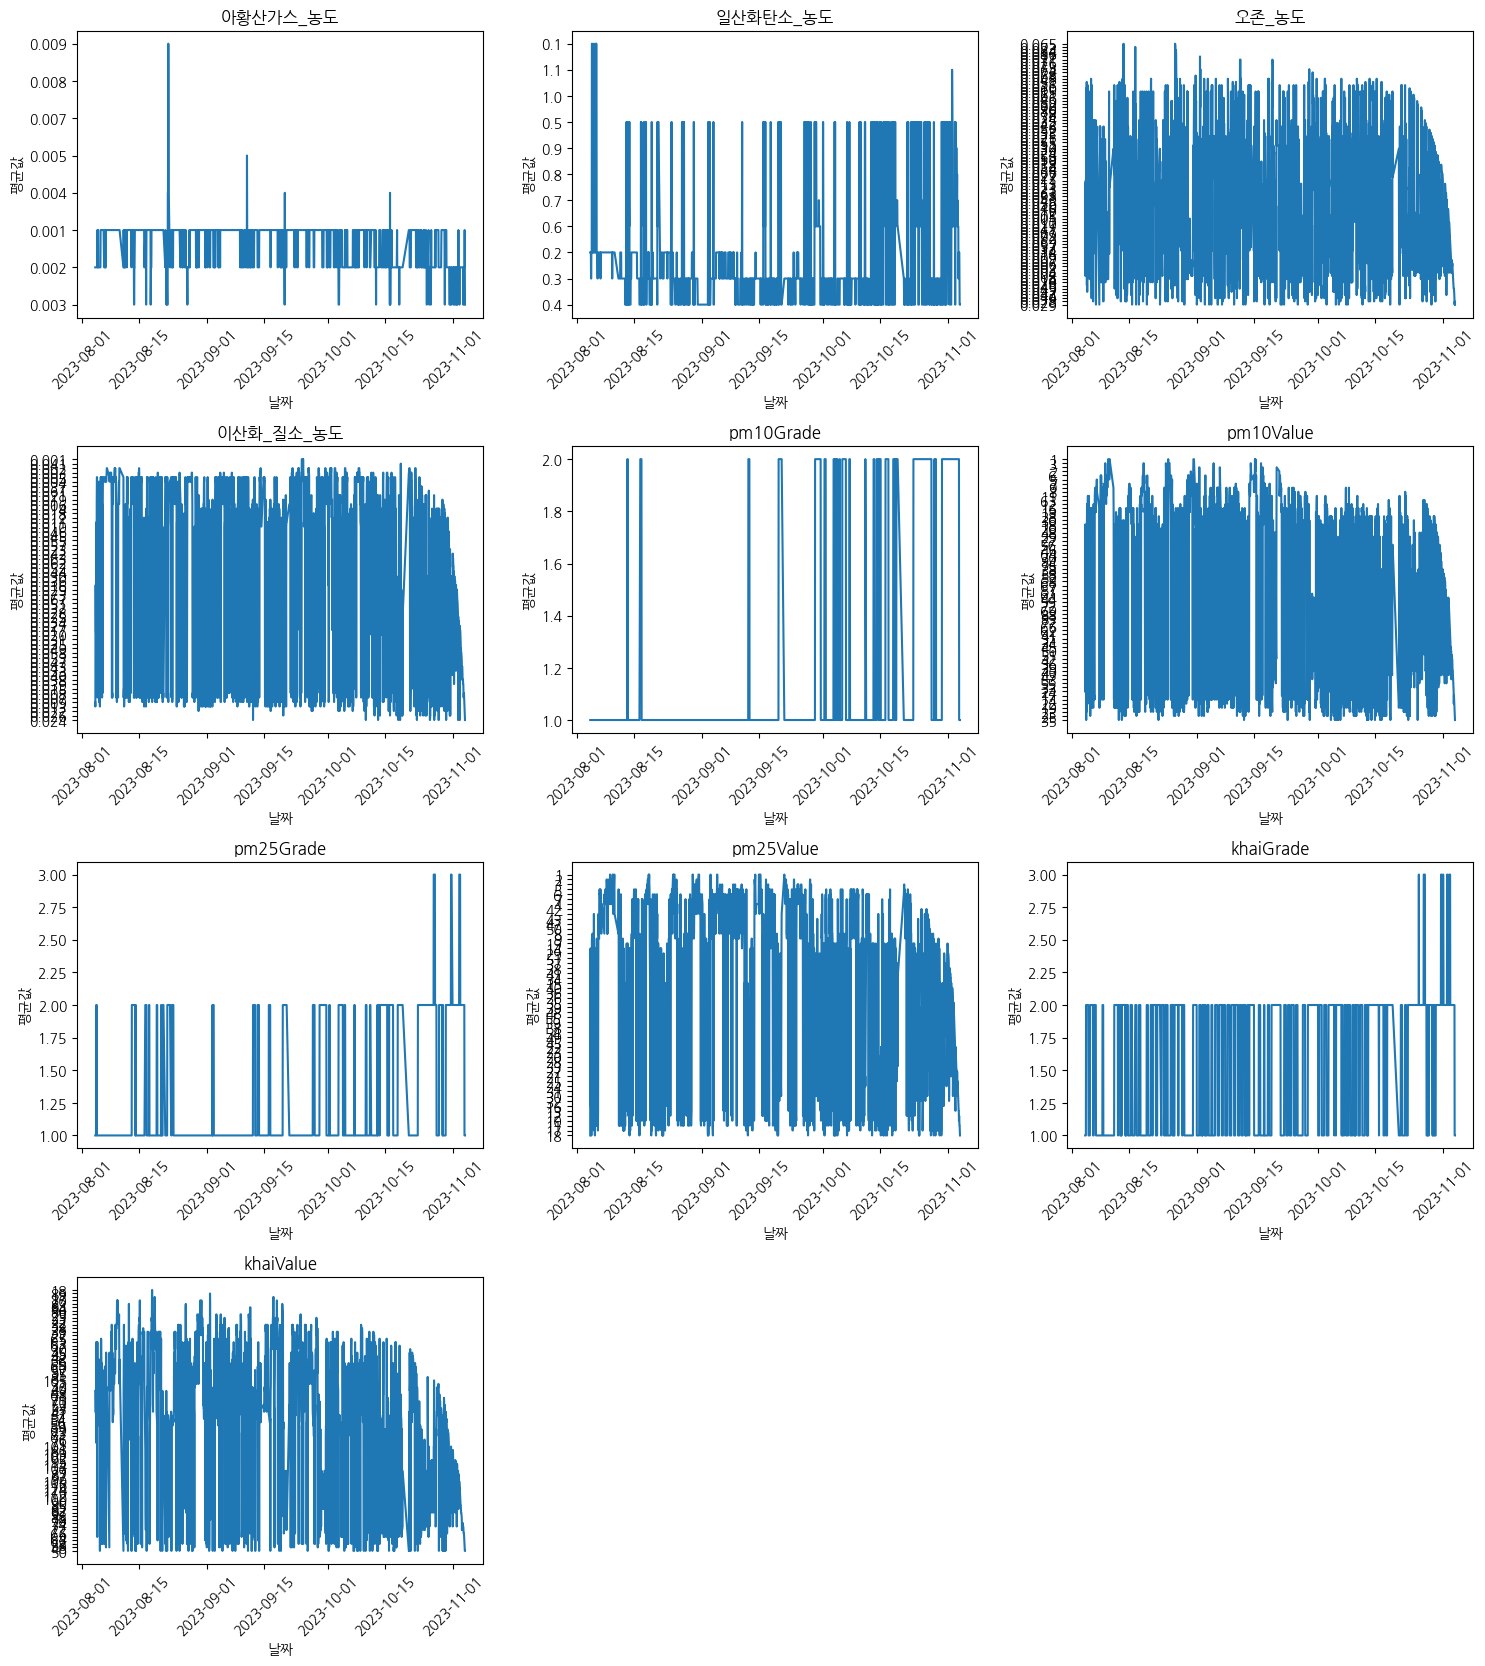

In [54]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumGothic')

df.columns = df.columns.str.replace(' ', '_')

selected_columns = ['측정일', '아황산가스_농도', '일산화탄소_농도',
    '오존_농도', '이산화_질소_농도',
    'pm10Grade', 'pm10Value',
    'pm25Grade', 'pm25Value', 'khaiGrade', 'khaiValue']

plt.figure(figsize=(15, 20))

for i, column in enumerate(selected_columns[1:]):
  plt.subplot(5, 3, i+1)
  plt.plot(df['측정일'], df[column])
  plt.title(column)
  plt.xlabel('날짜')
  plt.xticks(rotation=45)
  plt.ylabel('평균값')
plt.tight_layout()
plt.show()

In [55]:
# 'khaiValue' 열을 숫자로 변환 후, 값이 100 이상인 행 선택
df['khaiValue'] = pd.to_numeric(df['khaiValue'], errors='coerce')  # 문자열을 숫자로 변환
selected_rows = df[df['khaiValue'] >= 100]

# 선택된 행의 'khaiValue'와 '측정일' 열 값 출력
selected_values = selected_rows[['khaiValue', '측정일']]
print(selected_values)


     khaiValue                 측정일
28         100 2023-11-02 17:00:00
29         112 2023-11-02 16:00:00
30         170 2023-11-02 15:00:00
31         124 2023-11-02 14:00:00
32         124 2023-11-02 13:00:00
33         116 2023-11-02 12:00:00
34         109 2023-11-02 11:00:00
35         100 2023-11-02 10:00:00
46         107 2023-11-01 23:00:00
47         114 2023-11-01 22:00:00
70         102 2023-10-31 23:00:00
71         103 2023-10-31 22:00:00
80         109 2023-10-31 13:00:00
81         116 2023-10-31 12:00:00
82         112 2023-10-31 11:00:00
83         101 2023-10-31 10:00:00
178        100 2023-10-27 11:00:00
179        109 2023-10-27 10:00:00
180        116 2023-10-27 09:00:00
181        116 2023-10-27 08:00:00
182        116 2023-10-27 07:00:00
183        112 2023-10-27 06:00:00
184        105 2023-10-27 05:00:00
185        101 2023-10-27 04:00:00
186        101 2023-10-27 03:00:00
215        101 2023-10-25 22:00:00


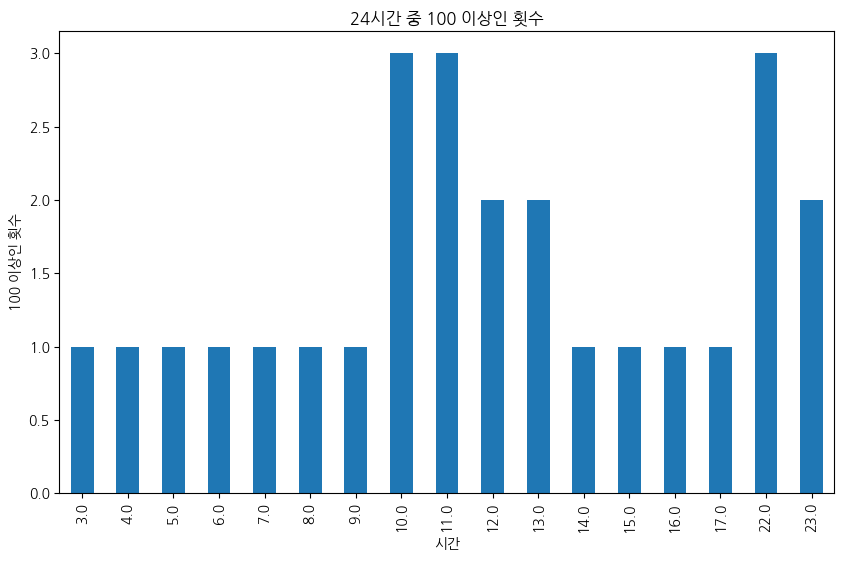

In [56]:
hourly_counts = selected_rows['time'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', x='시간', y='Count')
plt.xlabel('시간')
plt.ylabel('100 이상인 횟수')
plt.title('24시간 중 100 이상인 횟수')
plt.show()

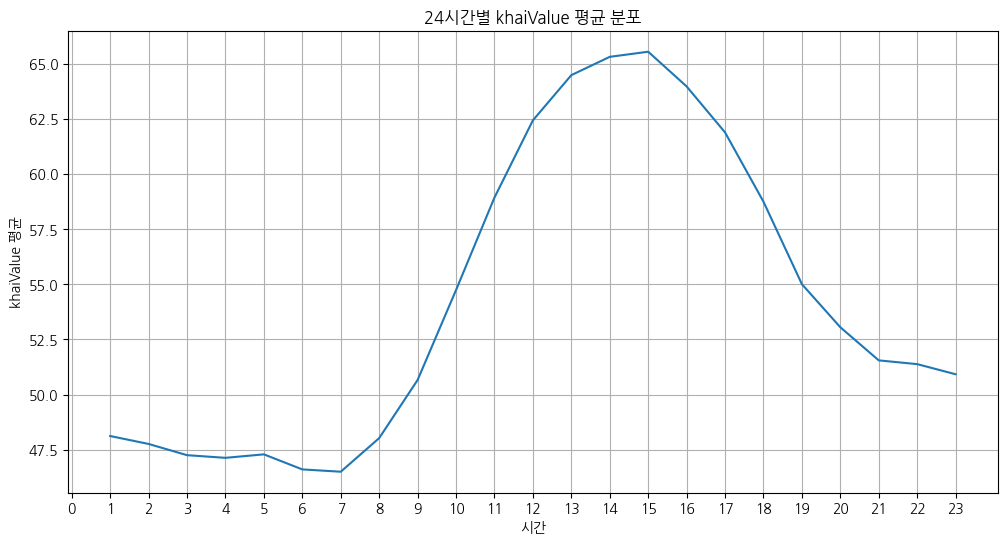

In [57]:
hourly_avg = df.groupby(['time'])['khaiValue'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg)
plt.xticks(range(24))  # X 축에 0부터 23까지 시간 표시
plt.xlabel('시간')
plt.ylabel('khaiValue 평균')
plt.title('24시간별 khaiValue 평균 분포')
plt.grid()
plt.show()

In [58]:
print(df.columns)

Index(['측정일', '아황산가스_농도', '아황산가스_지수', '일산화탄소_농도', '일산화탄소_지수', '오존_농도', '오존_지수',
       '이산화_질소_농도', '이산화질소_지수', 'pm10Grade', 'pm10Value', 'pm25Grade',
       'pm25Value', 'khaiGrade', 'khaiValue', 'year', 'month', 'day', 'time'],
      dtype='object')


In [59]:
print(df.isna().sum())

측정일          0
아황산가스_농도     0
아황산가스_지수     0
일산화탄소_농도     0
일산화탄소_지수     0
오존_농도        0
오존_지수        0
이산화_질소_농도    0
이산화질소_지수     0
pm10Grade    0
pm10Value    0
pm25Grade    0
pm25Value    0
khaiGrade    0
khaiValue    0
year         0
month        0
day          0
time         0
dtype: int64


In [15]:
df.fillna(0, inplace=True)


In [67]:
df.columns

Index(['측정일', '아황산가스_농도', '아황산가스_지수', '일산화탄소_농도', '일산화탄소_지수', '오존_농도', '오존_지수',
       '이산화_질소_농도', '이산화질소_지수', 'pm10Grade', 'pm10Value', 'pm25Grade',
       'pm25Value', 'khaiGrade', 'khaiValue', 'year', 'month', 'day', 'time'],
      dtype='object')

In [69]:
!pip install matplotlib

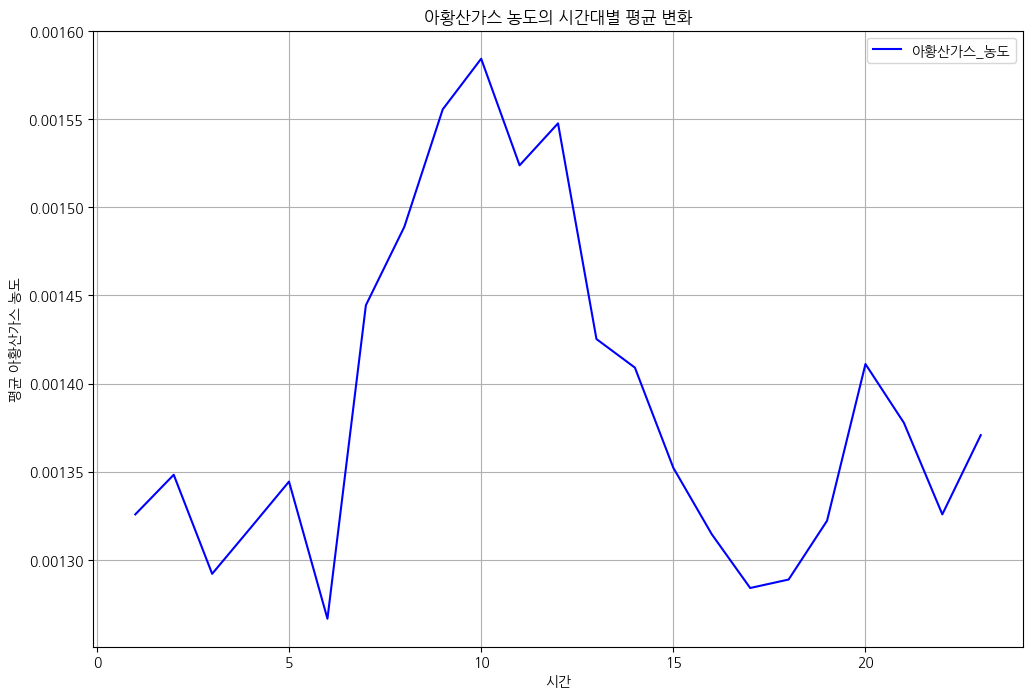

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/딥러닝/air.csv')

# 'time' 열을 기준으로 각 시간대별로 농도의 평균을 계산
df['측정일'] = pd.to_datetime(df['측정일'], format='%Y-%m-%d %H:%M', errors='coerce')

# 유효하지 않은 시간 값을 NaT (Not-a-Time)로 대체
df['측정일'].fillna(pd.NaT, inplace=True)

# '연', '월', '일', '시간' 열을 추출
df['year'] = df['측정일'].dt.year
df['month'] = df['측정일'].dt.month
df['day'] = df['측정일'].dt.day
df['time'] = df['측정일'].dt.hour
hourly_concentration = df.groupby('time')['아황산가스 농도'].apply(lambda x: pd.to_numeric(x, errors='coerce').mean())

# 그래프 그리기
plt.figure(figsize=(12, 8))

plt.plot(hourly_concentration.index, hourly_concentration.values, label='아황산가스_농도', color='blue')

plt.xlabel('시간')
plt.ylabel('평균 아황산가스 농도')
plt.title('아황산가스 농도의 시간대별 평균 변화')
plt.legend()
plt.grid()

plt.show()





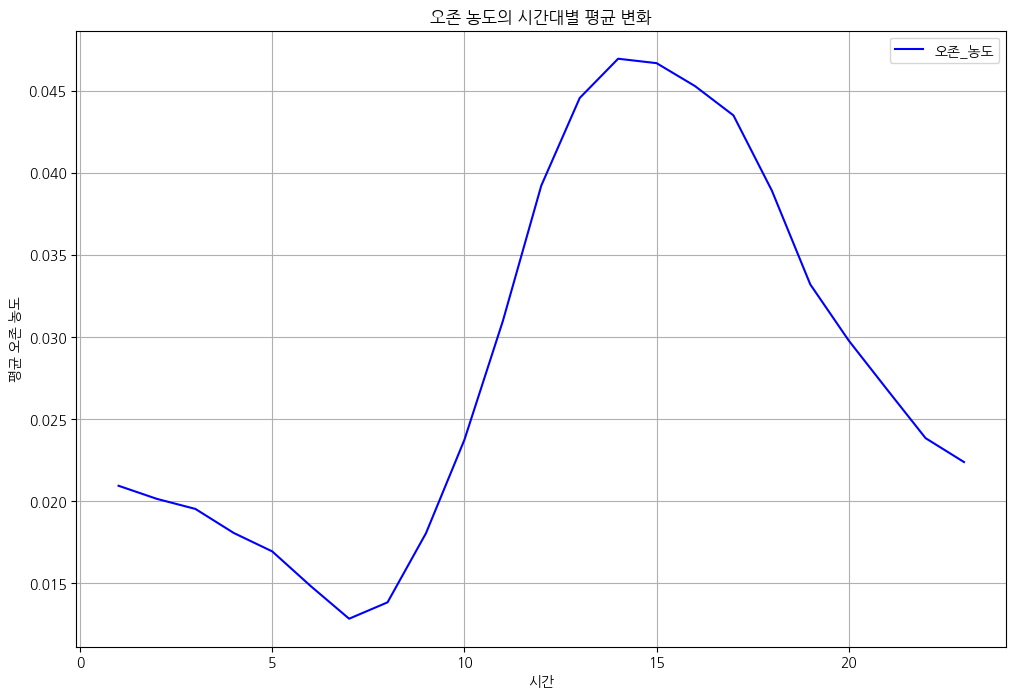

In [83]:
hourly_concentration = df.groupby('time')['오존 농도'].apply(lambda x: pd.to_numeric(x, errors='coerce').mean())

# 그래프 그리기
plt.figure(figsize=(12, 8))

plt.plot(hourly_concentration.index, hourly_concentration.values, label='오존_농도', color='blue')

plt.xlabel('시간')
plt.ylabel('평균 오존 농도')
plt.title('오존 농도의 시간대별 평균 변화')
plt.legend()
plt.grid()

plt.show()


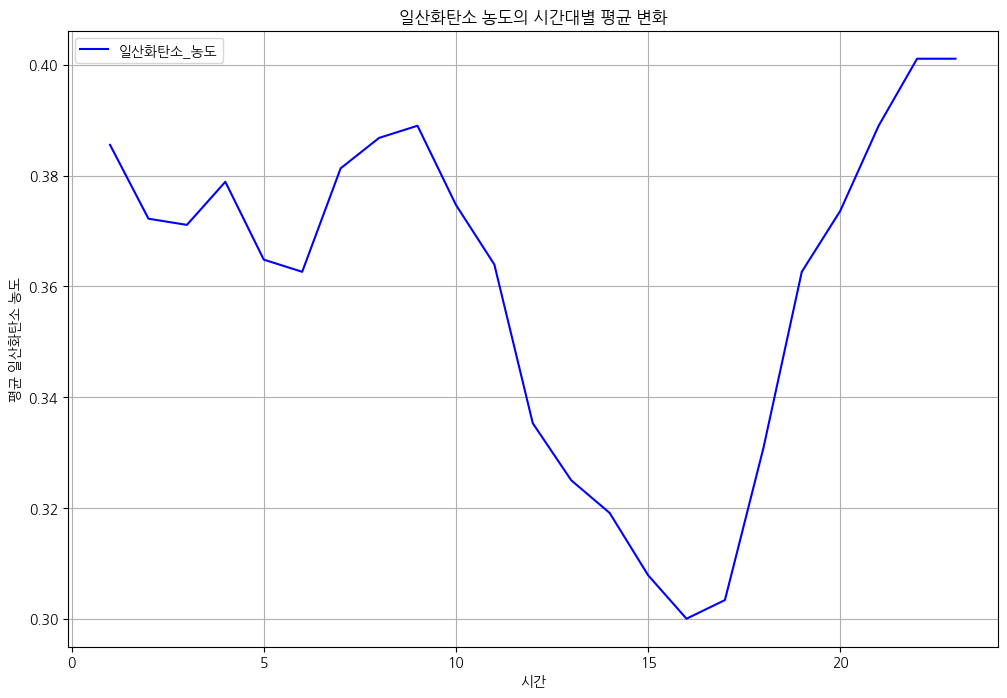

In [84]:
hourly_concentration = df.groupby('time')['일산화탄소 농도'].apply(lambda x: pd.to_numeric(x, errors='coerce').mean())

# 그래프 그리기
plt.figure(figsize=(12, 8))

plt.plot(hourly_concentration.index, hourly_concentration.values, label='일산화탄소_농도', color='blue')

plt.xlabel('시간')
plt.ylabel('평균 일산화탄소 농도')
plt.title('일산화탄소 농도의 시간대별 평균 변화')
plt.legend()
plt.grid()

plt.show()

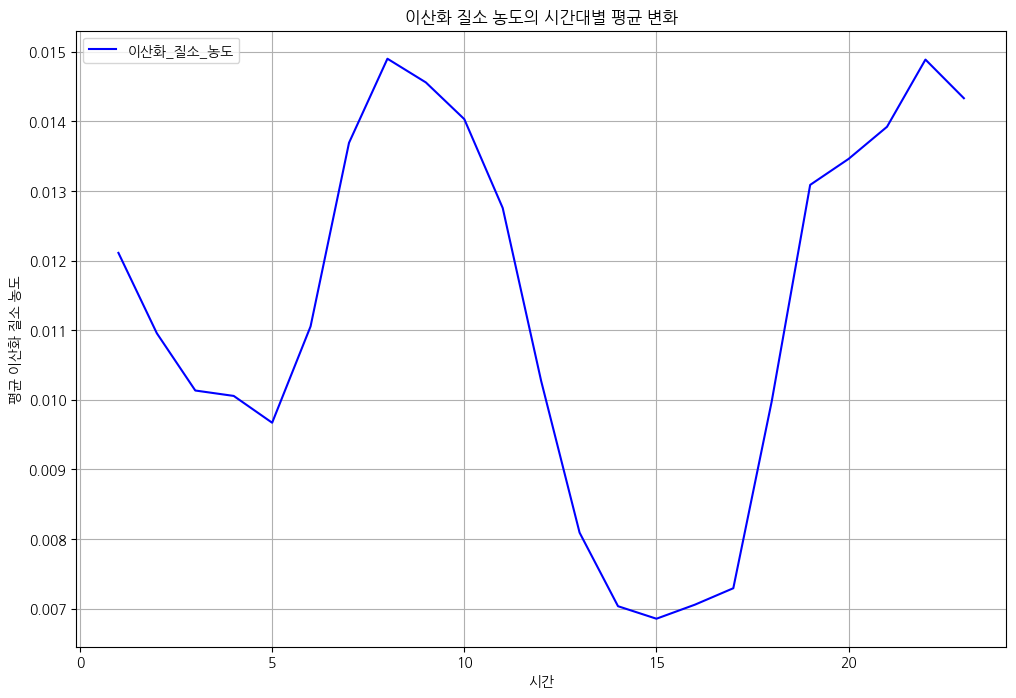

In [85]:
hourly_concentration = df.groupby('time')['이산화 질소 농도'].apply(lambda x: pd.to_numeric(x, errors='coerce').mean())

# 그래프 그리기
plt.figure(figsize=(12, 8))

plt.plot(hourly_concentration.index, hourly_concentration.values, label='이산화_질소_농도', color='blue')

plt.xlabel('시간')
plt.ylabel('평균 이산화 질소 농도')
plt.title('이산화 질소 농도의 시간대별 평균 변화')
plt.legend()
plt.grid()

plt.show()